# IonQ Qiskit Provider Example

This notebook will walk you through a basic example of using an IonQ backend with Qiskit

### Setup

In [1]:
# import packages
from qiskit import QuantumCircuit

# for the visualization methods to work, you will also need matplotlib installed.
from qiskit.visualization import plot_histogram

from qiskit_ionq_provider import IonQProvider

# if you instantiate the provider without a token, it looks in the QISKIT_IONQ_API_TOKEN env var. 
# you can also pass your token to the provider directly as a string.
# if you provide neither, it will fail on your first external call ()
provider = IonQProvider()

## Build a circuit

Circuit building and visualization should feel nearly identical to building a circuit using any other backend. 

There are only a few things to note: IonQ backends do not allow arbitrary unitaries, barriers, mid-circuit resets or measurements, or multi-experiment jobs. In practice, this means using `barrier`, `reset`, `u1`, `u2`, `u3`, `cu1`, `cu2`, or `cu3` gates will throw an exception on submission, as will measuring mid-circuit, and submmitting jobs with multiple experiments.

In [8]:
# initialize the quantum circuit object with a quantum register length two and a classical register length two
qc = QuantumCircuit(4,2)

# add gates — here we're creating a simple bell pair
qc.h(2)
qc.cnot(2,3)
qc.measure(2,0)
qc.measure(3,1)

# draw the circuit to make sure it's what we expect
qc.draw()

q_0: ────────────────
                     
q_1: ────────────────
     ┌───┐     ┌─┐   
q_2: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_3: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

## Run on an IonQ Backend

In [9]:
# view list of available backends
provider.backends()

[<IonQSimulatorBackend('ionq_simulator') from <qiskit_ionq_provider.ionq_provider.IonQProvider object at 0x102d73c10>()>,
 <IonQQPUBackend('ionq_qpu') from <qiskit_ionq_provider.ionq_provider.IonQProvider object at 0x102d73c10>()>]

In [10]:
# load backend by using the get_backend method
backend = provider.get_backend("ionq_simulator")

In [11]:
# submit the circuit
job = backend.run(qc)

In [12]:
# poll for the job's result   
result = job.result()

In [13]:
#get counts
counts = result.get_counts()
print(counts)

{'00': 512, '11': 512}


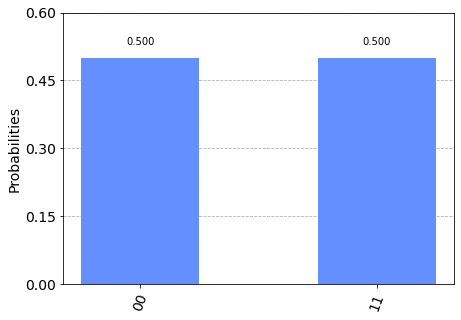

In [14]:
#visualize counts
plot_histogram(counts)

## Retrieve previously-run jobs

You can use the `backend.retrieve_job(job_id)` method to get jobs that you've previously run by their ID. be sure that you run the cell that defines backend above so that it's defined. 

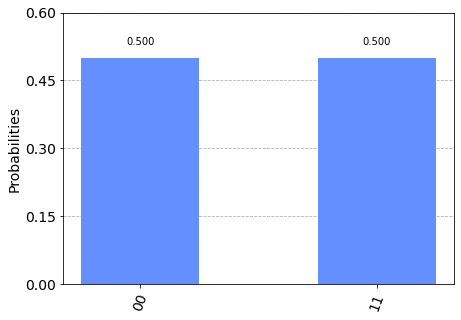

In [15]:
# Retrieve with job id. You can get this from a submitted job with the job_id() method.
job_id = job.job_id()
retrieved = backend.retrieve_job(job_id) 
counts = retrieved.result().get_counts()
plot_histogram(counts)